In [1]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

file = "C:/code/Python/Kaggle/Introduction to Deep Learning/input/fuel.csv"
fuel = pd.read_csv(file)

X = fuel.copy()

# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [4]:
# Uncomment to see original data
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [5]:
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(150, activation='relu', input_shape=input_shape),
    layers.Dense(100, activation='relu'),    
    layers.Dense(50, activation='relu'),
    layers.Dense(1),
])

In [7]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [8]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 [==============================] - 0s 1ms/step - loss: 9.5344
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 2.8386
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9808
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2330
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1045
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0715
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0595
Epoch 9/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 10/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0407
Epoch 11/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 13/200
9/9 [==============================] - 0s 1ms/st

9/9 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 105/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 106/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 107/200
9/9 [==============================] - 0s 1000us/step - loss: 0.0021
Epoch 108/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 109/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 110/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 111/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 112/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 113/200
9/9 [==============================] - 0s 1000us/step - loss: 0.0020
Epoch 114/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 115/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 116/200
9/9 [=============================

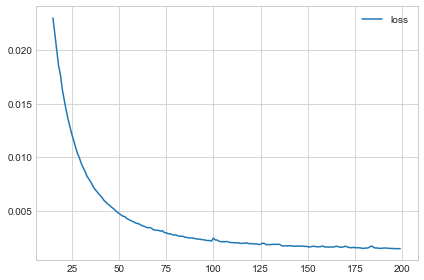

In [12]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[15:, ['loss']].plot();